<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [21]:
import piplite # Need to run this to import seaborn on JupyterLite. Not sure if other platforms are the same or not?
await piplite.install('seaborn') # Need to run this to import seaborn on JupyterLite. Not sure if other platforms are the same or not?
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load the dataset into a dataframe.


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [2]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [3]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [4]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [5]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [6]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


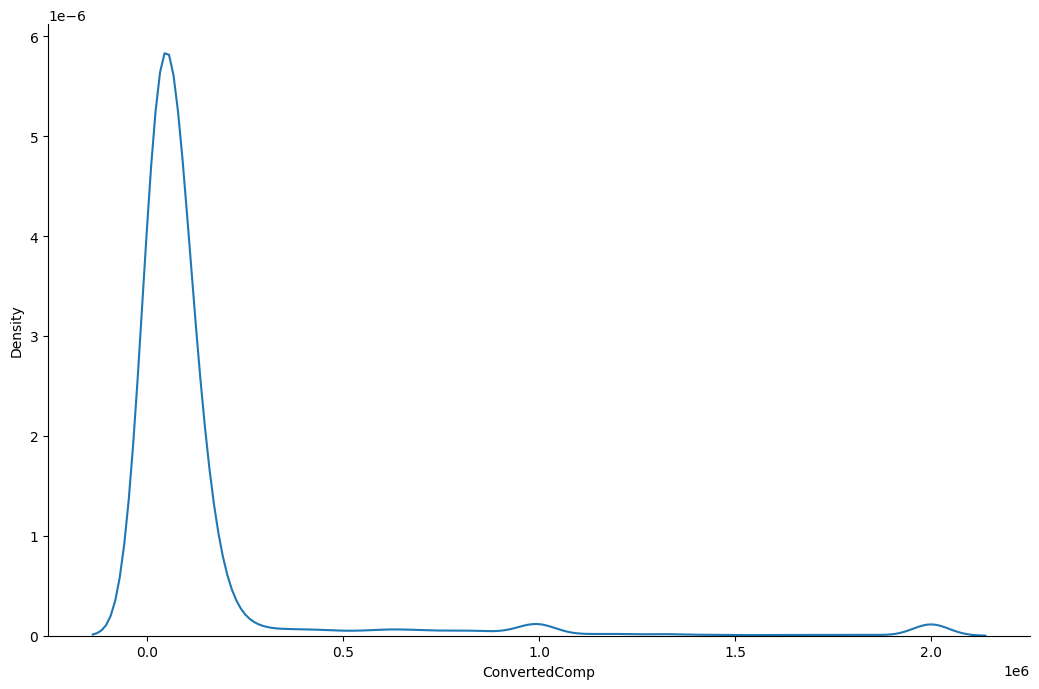

In [28]:
# your code goes here
sns.displot(df['ConvertedComp'], kind="kde", height=7, aspect = 1.5)

Plot the histogram for the column `ConvertedComp`.


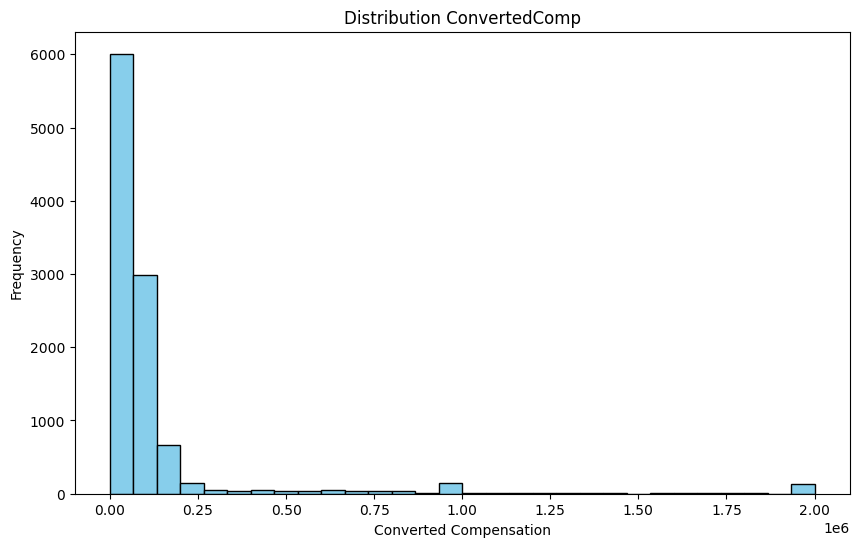

In [7]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(x=df['ConvertedComp'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.title('Distribution ConvertedComp')
plt.show()

What is the median of the column `ConvertedComp`?


In [8]:
# your code goes here
ConvertedComp_Median = df['ConvertedComp'].median()
Age_Median = df['Age'].median()
print("ConvertedComp Median: {}".format(ConvertedComp_Median))
print("Age Median: {}".format(Age_Median))

ConvertedComp Median: 57745.0
Age Median: 29.0


How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
#Method 1
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

In [10]:
# your code goes here
#Method 2
Total_Man = df.loc[df['Gender'] == "Man"]
print("Total have {} identofied themself as man.".format(len(Total_Man)))

Total have 10480 identofied themself as man.


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [11]:
# your code goes here
Total_Woman = df.loc[df['Gender'] == "Woman"]
Woman_Median_ConvertedComp = Total_Woman['ConvertedComp'].median()
print("Women Median ConvertedComp: {}.".format(Woman_Median_ConvertedComp))

Women Median ConvertedComp: 57708.0.


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [12]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


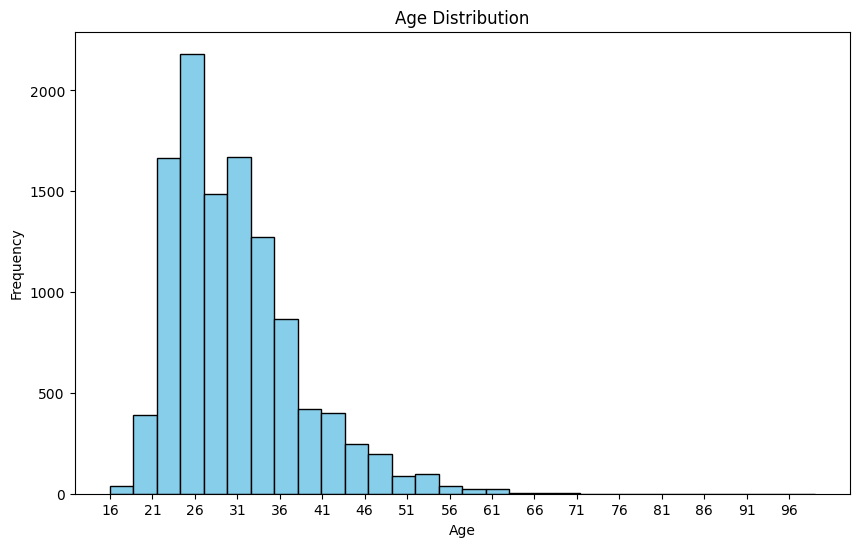

In [13]:
# your code goes here
plt.figure(figsize=(10, 6))
plt.hist(x=df['Age'], bins=30, color='skyblue', edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.xticks(range(int(df['Age'].min()), int(df['Age'].max())+1, 5))
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


In [14]:
df['ConvertedComp']

0         61000.0
1         95179.0
2         90000.0
3        455352.0
4         65277.0
           ...   
11393    130000.0
11394     19880.0
11395    105000.0
11396     80371.0
11397         NaN
Name: ConvertedComp, Length: 11398, dtype: float64

Find out the Inter Quartile Range for the column `ConvertedComp`.


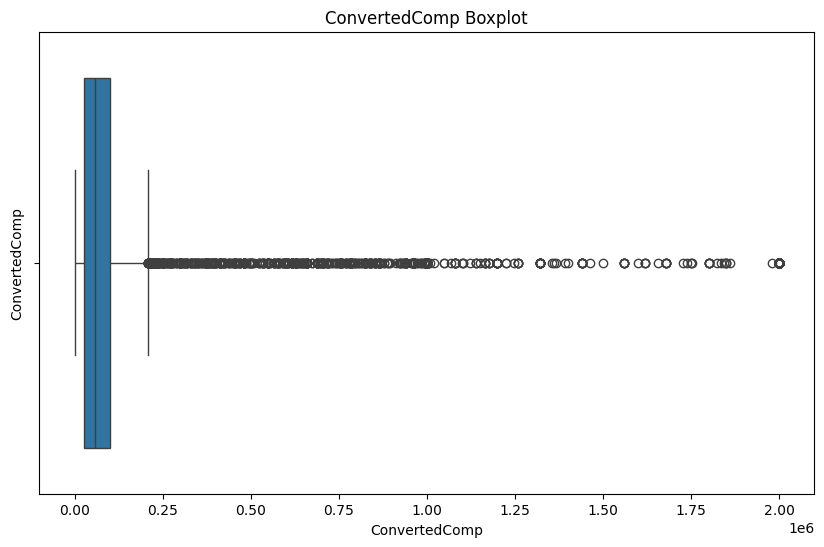

In [67]:
# your code goes here
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['ConvertedComp'], orient = 'h')
plt.ylabel('ConvertedComp')
plt.title('ConvertedComp Boxplot')
plt.show()

We can find out the Inter Quartile Range for the column ConvertedComp.

In [44]:
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

IQR = Q3 - Q1

print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  26868.0
Q3:  100000.0
IQR:  73132.0


Find out the upper and lower bounds.


In [45]:
# your code goes here
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Upper Bound: 209698.0
Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [53]:
# your code goes here
Outlier = df.loc[(df['ConvertedComp'] > upper_bound) | (df['ConvertedComp'] < lower_bound)]
print("Total number of outlier in ConvertedComp column has {}.".format(len(Outlier)))

Total number of outlier in ConvertedComp column has 879.


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [49]:
df.shape

(11398, 85)

In [59]:
# your code goes here
df_Remove_Outlier_ConvertedComp = df.loc[(df['ConvertedComp'] <= upper_bound) & (df['ConvertedComp'] >= lower_bound)]
df_Remove_Outlier_ConvertedComp.shape

(9703, 85)

What is the median ConvertedComp after removing outliers?

In [60]:
df_Remove_Outlier_ConvertedComp['ConvertedComp'].median()

52704.0

What is the mean ConvertedComp after removing outliers? 

In [69]:
df_Remove_Outlier_ConvertedComp['ConvertedComp'].mean()

59883.20838915799

Based on the boxplot of ‘Age’ how many outliers do you see below Q1?

In [65]:
#Calculate Upper and Lower Bound
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR = Q3 - Q1

print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

print("Upper Bound:", upper_bound)
print("Lower Bound:", lower_bound)

Q1_Outlier_Age = df[df['Age'] < lower_bound]
print("Total number of Age Q1 outlier {}.".format(len(Q1_Outlier_Age)))

Q1:  25.0
Q3:  35.0
IQR:  10.0
Upper Bound: 50.0
Lower Bound: 10.0
Total number of Age Q1 outlier 0.


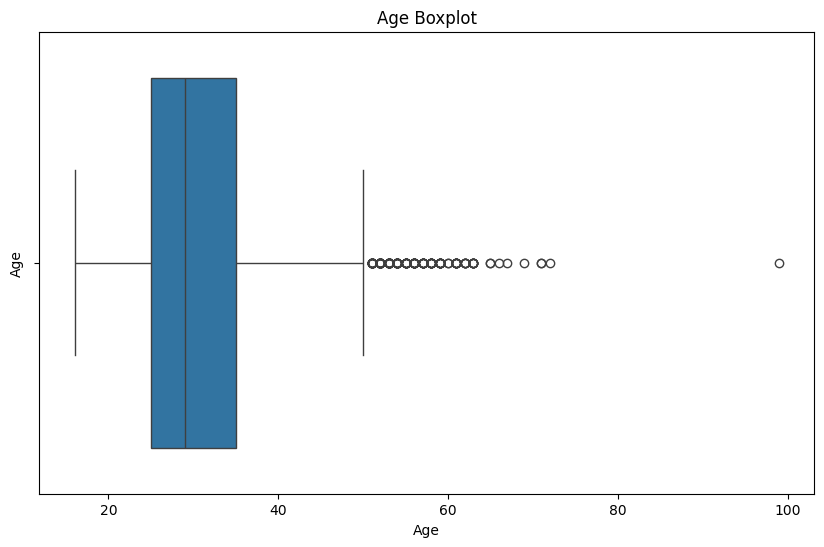

In [68]:
#Create boxplot for Age
plt.figure(figsize=(10, 6))
sns.boxplot(data=df['Age'], orient = 'h')
plt.ylabel('Age')
plt.title('Age Boxplot')
plt.show()

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [76]:
# your code goes here
df.corr()

<ipython-input-76-2278162ba8b1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


In [71]:
df_Remove_Outlier_ConvertedComp['ConvertedComp'].describe()

count      9703.000000
mean      59883.208389
std       43394.336755
min           0.000000
25%       24060.000000
50%       52704.000000
75%       85574.500000
max      209356.000000
Name: ConvertedComp, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
